In [ ]:
#Step 1: Import all dependencies
#Step 2: Read data, normalize 
#Step 3: Apply logistic regression RFECV with CV = 5 folds
        #Plot the CV score with number of features
#Step 4: Visualize how many and which features are being filtered
#Step 5: Filter out features
        #Apply algorithms 
        #Use metrics : Accuracy, mean score, std, G-mean score, precision, recall and F-score

#Repeat step 3,4 and 5 for each subsets. 


In [59]:
# Keep all of your imports here

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [60]:
# Reading data properly
df = pd.read_csv("pd_speech_features.csv", header=1)

X = df.drop(["class"], axis=1)
y = df["class"]

min_max_scaler = MinMaxScaler()
xScaled = min_max_scaler.fit_transform(X)

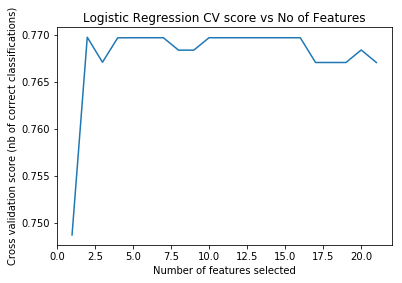

In [89]:
#RFECV 
logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, step=1, cv=5, scoring='accuracy')
rfecv.fit(xScaled[:,2:23], y)
#plot of numbers of features vs cross validation score 
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [90]:
#important features
Features = df.iloc[:,2:23]
feature_importance = list(zip(Features, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)
len(new_features)

['numPulses', 'apq11Shimmer']


2

In [109]:
#algorithms apply 
X_rfecv=rfecv.transform(xScaled[:,2:23])
def calculateAlogorithmAccuracy(model):
    from sklearn.metrics import classification_report
    from sklearn.metrics import accuracy_score, confusion_matrix
    import numpy as np
    import numpy as np
    from sklearn import metrics
    #from imblearn.metrics import geometric_mean_score           //Installation of library for gmean failed
    from sklearn.metrics.cluster import fowlkes_mallows_score     #calculates gmean score
    
    skf = StratifiedKFold(n_splits=5, random_state=None)
    testac = []
    # # X is the feature set and y is the target
    for train_index, test_index in skf.split(X_rfecv,y): 
        X_train, X_test = X_rfecv[train_index], X_rfecv[test_index] 
        y_train, y_test = y[train_index], y[test_index]
    
        clf = model
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        testac.append(accuracy_score(y_test, preds))
        
    results = model_selection.cross_val_score(model, X, y, cv=skf, scoring='roc_auc')
    print('Accuracy of classifier on test set: {:.2f}'
     .format(accuracy_score(y_test, preds)))
    print("mean and std on training = ",(results.mean(),results.std()))
    print("mean and std on test",(np.mean(testac), np.std(testac)))
    classreport = classification_report(y_test, preds)
    print("G-mean score = ",fowlkes_mallows_score(y_test, preds, sparse=False))
    #print(imblearn.metrics.geometric_mean_score(y_test, preds))
    print(classreport)
    

calculateAlogorithmAccuracy(GaussianNB())
calculateAlogorithmAccuracy(RandomForestClassifier(n_estimators=10, random_state=0))
calculateAlogorithmAccuracy(LogisticRegression(solver='liblinear', multi_class='ovr'))
calculateAlogorithmAccuracy(DecisionTreeClassifier())


Accuracy of classifier on test set: 0.71
mean and std on training =  (0.7163899153943402, 0.05328746184368358)
mean and std on test (0.7697231323341467, 0.03416948173797763)
G-mean score =  0.7263636876583188
             precision    recall  f1-score   support

          0       0.31      0.11      0.16        38
          1       0.75      0.92      0.83       112

avg / total       0.64      0.71      0.66       150

Accuracy of classifier on test set: 0.69
mean and std on training =  (0.8050375204092599, 0.04579629183465891)
mean and std on test (0.6944439409782734, 0.01925126116441641)
G-mean score =  0.6620690888603029
             precision    recall  f1-score   support

          0       0.38      0.34      0.36        38
          1       0.78      0.81      0.80       112

avg / total       0.68      0.69      0.69       150

Accuracy of classifier on test set: 0.74
mean and std on training =  (0.722165757313638, 0.045167709551344665)
mean and std on test (0.7499780411293134,

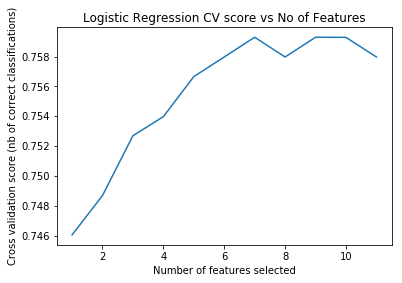

In [110]:
#RFECV 
logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, step=1, cv=5, scoring='accuracy')
rfecv.fit(xScaled[:,23:34], y)
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [111]:
Features = df.iloc[:,23:34]
feature_importance = list(zip(Features, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)
len(new_features)

['minIntensity', 'meanIntensity', 'f1', 'f2', 'f3', 'f4', 'b1', 'b2', 'b4']


9

In [112]:
X_rfecv=rfecv.transform(xScaled[:,23:34])
calculateAlogorithmAccuracy(GaussianNB())
calculateAlogorithmAccuracy(RandomForestClassifier(n_estimators=10, random_state=0))
calculateAlogorithmAccuracy(LogisticRegression(solver='liblinear', multi_class='ovr'))
calculateAlogorithmAccuracy(DecisionTreeClassifier())


Accuracy of classifier on test set: 0.67
mean and std on training =  (0.7163899153943402, 0.05328746184368358)
mean and std on test (0.7102678052747764, 0.08244268234690098)
G-mean score =  0.6191459809242784
             precision    recall  f1-score   support

          0       0.38      0.50      0.43        38
          1       0.81      0.72      0.76       112

avg / total       0.70      0.67      0.68       150

Accuracy of classifier on test set: 0.76
mean and std on training =  (0.8050375204092599, 0.04579629183465891)
mean and std on test (0.7685040083652842, 0.05462682463154072)
G-mean score =  0.7175837048041547
             precision    recall  f1-score   support

          0       0.53      0.42      0.47        38
          1       0.82      0.88      0.84       112

avg / total       0.74      0.76      0.75       150

Accuracy of classifier on test set: 0.77
mean and std on training =  (0.722165757313638, 0.045167709551344665)
mean and std on test (0.7592935982339956,

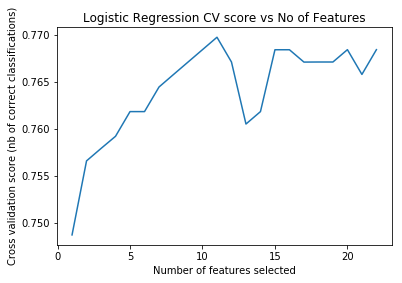

In [113]:
#RFECV 
logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, step=1, cv=5, scoring='accuracy')
rfecv.fit(xScaled[:,34:56], y)
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [114]:
Features = df.iloc[:,34:56]
feature_importance = list(zip(Features, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)
len(new_features)

['GQ_std_cycle_open', 'GNE_mean', 'GNE_std', 'GNE_SNR_SEO', 'GNE_NSR_SEO', 'VFER_mean', 'VFER_entropy', 'VFER_SNR_TKEO', 'IMF_SNR_SEO', 'IMF_SNR_TKEO', 'IMF_SNR_entropy']


11

In [115]:
X_rfecv=rfecv.transform(xScaled[:,34:56])
calculateAlogorithmAccuracy(GaussianNB())
calculateAlogorithmAccuracy(RandomForestClassifier(n_estimators=10, random_state=0))
calculateAlogorithmAccuracy(LogisticRegression(solver='liblinear', multi_class='ovr'))
calculateAlogorithmAccuracy(DecisionTreeClassifier())

Accuracy of classifier on test set: 0.70
mean and std on training =  (0.7163899153943402, 0.05328746184368358)
mean and std on test (0.7380306727082606, 0.03221622755317151)
G-mean score =  0.6912724847900482
             precision    recall  f1-score   support

          0       0.35      0.21      0.26        38
          1       0.76      0.87      0.81       112

avg / total       0.66      0.70      0.67       150

Accuracy of classifier on test set: 0.71
mean and std on training =  (0.8050375204092599, 0.04579629183465891)
mean and std on test (0.7328461717206924, 0.03899213256237322)
G-mean score =  0.6730596686834296
             precision    recall  f1-score   support

          0       0.43      0.39      0.41        38
          1       0.80      0.82      0.81       112

avg / total       0.71      0.71      0.71       150

Accuracy of classifier on test set: 0.75
mean and std on training =  (0.722165757313638, 0.045167709551344665)
mean and std on test (0.7658024863483213,

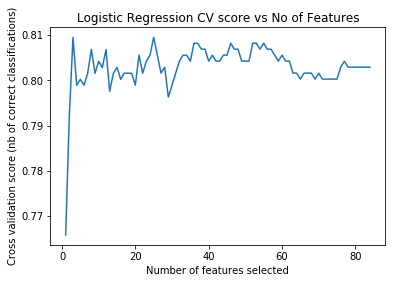

In [116]:

#RFECV 
logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, step=1, cv=5, scoring='accuracy')
rfecv.fit(xScaled[:,56:140], y)
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [117]:
Features = df.iloc[:,56:140]
feature_importance = list(zip(Features, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)
len(new_features)

['mean_MFCC_2nd_coef', 'mean_MFCC_3rd_coef', 'mean_MFCC_4th_coef', 'mean_MFCC_6th_coef', 'mean_MFCC_7th_coef', 'mean_MFCC_8th_coef', 'mean_MFCC_10th_coef', 'mean_delta_log_energy', 'mean_0th_delta', 'mean_1st_delta', 'mean_2nd_delta', 'mean_11th_delta_delta', 'std_MFCC_2nd_coef', 'std_MFCC_3rd_coef', 'std_MFCC_12th_coef', 'std_delta_log_energy', 'std_2nd_delta', 'std_6th_delta', 'std_7th_delta', 'std_8th_delta', 'std_delta_delta_log_energy', 'std_6th_delta_delta', 'std_7th_delta_delta', 'std_8th_delta_delta', 'std_9th_delta_delta']


25

In [118]:
X_rfecv=rfecv.transform(xScaled[:,56:140])
calculateAlogorithmAccuracy(GaussianNB())
calculateAlogorithmAccuracy(RandomForestClassifier(n_estimators=10, random_state=0))
calculateAlogorithmAccuracy(LogisticRegression(solver='liblinear', multi_class='ovr'))
calculateAlogorithmAccuracy(DecisionTreeClassifier())

Accuracy of classifier on test set: 0.60
mean and std on training =  (0.7163899153943402, 0.05328746184368358)
mean and std on test (0.6533042872080864, 0.03738812013834793)
G-mean score =  0.5769499017487338
             precision    recall  f1-score   support

          0       0.38      0.89      0.53        38
          1       0.93      0.50      0.65       112

avg / total       0.79      0.60      0.62       150

Accuracy of classifier on test set: 0.74
mean and std on training =  (0.8050375204092599, 0.04579629183465891)
mean and std on test (0.7987929592192401, 0.03302699157180501)
G-mean score =  0.6823586157925698
             precision    recall  f1-score   support

          0       0.49      0.53      0.51        38
          1       0.83      0.81      0.82       112

avg / total       0.75      0.74      0.74       150

Accuracy of classifier on test set: 0.79
mean and std on training =  (0.722165757313638, 0.045167709551344665)
mean and std on test (0.825336237945858, 

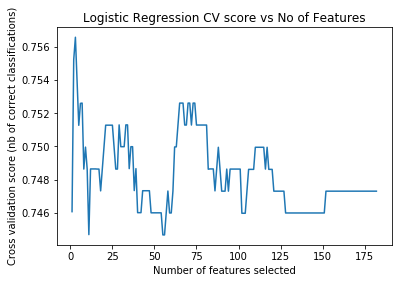

In [119]:
#RFECV 
logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, step=1, cv=5, scoring='accuracy')
rfecv.fit(xScaled[:,140:322], y)
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [120]:
Features = df.iloc[:,140:322]
feature_importance = list(zip(Features, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)
len(new_features)

['app_det_TKEO_mean_3_coef', 'app_TKEO_std_4_coef', 'det_LT_entropy_log_3_coef']


3

In [121]:
X_rfecv=rfecv.transform(xScaled[:,140:322])
calculateAlogorithmAccuracy(GaussianNB())
calculateAlogorithmAccuracy(RandomForestClassifier(n_estimators=10, random_state=0))
calculateAlogorithmAccuracy(LogisticRegression(solver='liblinear', multi_class='ovr'))
calculateAlogorithmAccuracy(DecisionTreeClassifier())

Accuracy of classifier on test set: 0.73
mean and std on training =  (0.7163899153943402, 0.05328746184368358)
mean and std on test (0.7605389799000812, 0.038018802669934765)
G-mean score =  0.7403148967097324
             precision    recall  f1-score   support

          0       0.36      0.11      0.16        38
          1       0.76      0.94      0.84       112

avg / total       0.66      0.73      0.67       150

Accuracy of classifier on test set: 0.66
mean and std on training =  (0.8050375204092599, 0.04579629183465891)
mean and std on test (0.6786016033461136, 0.05997474764611168)
G-mean score =  0.6455096455144085
             precision    recall  f1-score   support

          0       0.30      0.26      0.28        38
          1       0.76      0.79      0.78       112

avg / total       0.64      0.66      0.65       150

Accuracy of classifier on test set: 0.74
mean and std on training =  (0.722165757313638, 0.045167709551344665)
mean and std on test (0.75393412338794, 

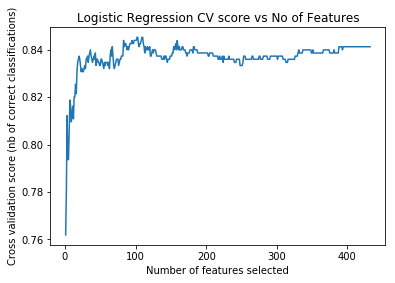

In [122]:
logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, step=1, cv=5, scoring='accuracy')
rfecv.fit(xScaled[:,322:754], y)
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [123]:
Features = df.iloc[:,322:754]
feature_importance = list(zip(Features, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)
len(new_features)

['tqwt_energy_dec_5', 'tqwt_energy_dec_6', 'tqwt_energy_dec_7', 'tqwt_energy_dec_15', 'tqwt_energy_dec_17', 'tqwt_energy_dec_18', 'tqwt_energy_dec_19', 'tqwt_energy_dec_21', 'tqwt_energy_dec_25', 'tqwt_entropy_shannon_dec_3', 'tqwt_entropy_shannon_dec_6', 'tqwt_entropy_shannon_dec_11', 'tqwt_entropy_shannon_dec_17', 'tqwt_entropy_shannon_dec_23', 'tqwt_entropy_shannon_dec_25', 'tqwt_entropy_shannon_dec_27', 'tqwt_entropy_shannon_dec_34', 'tqwt_entropy_shannon_dec_35', 'tqwt_entropy_log_dec_1', 'tqwt_entropy_log_dec_9', 'tqwt_entropy_log_dec_10', 'tqwt_entropy_log_dec_12', 'tqwt_entropy_log_dec_16', 'tqwt_entropy_log_dec_17', 'tqwt_entropy_log_dec_18', 'tqwt_entropy_log_dec_20', 'tqwt_entropy_log_dec_23', 'tqwt_entropy_log_dec_25', 'tqwt_entropy_log_dec_26', 'tqwt_entropy_log_dec_27', 'tqwt_entropy_log_dec_28', 'tqwt_entropy_log_dec_33', 'tqwt_entropy_log_dec_34', 'tqwt_entropy_log_dec_35', 'tqwt_TKEO_mean_dec_11', 'tqwt_TKEO_mean_dec_14', 'tqwt_TKEO_mean_dec_17', 'tqwt_TKEO_mean_dec_26

103

In [124]:
X_rfecv=rfecv.transform(xScaled[:,322:754])
calculateAlogorithmAccuracy(GaussianNB())
calculateAlogorithmAccuracy(RandomForestClassifier(n_estimators=10, random_state=0))
calculateAlogorithmAccuracy(LogisticRegression(solver='liblinear', multi_class='ovr'))
calculateAlogorithmAccuracy(DecisionTreeClassifier())

Accuracy of classifier on test set: 0.75
mean and std on training =  (0.7163899153943402, 0.05328746184368358)
mean and std on test (0.783047287091902, 0.02007069301402009)
G-mean score =  0.682881942399946
             precision    recall  f1-score   support

          0       0.51      0.66      0.57        38
          1       0.87      0.79      0.83       112

avg / total       0.78      0.75      0.76       150

Accuracy of classifier on test set: 0.80
mean and std on training =  (0.8050375204092599, 0.04579629183465891)
mean and std on test (0.8082572324851865, 0.027911145998174753)
G-mean score =  0.7427171768359347
             precision    recall  f1-score   support

          0       0.61      0.58      0.59        38
          1       0.86      0.88      0.87       112

avg / total       0.80      0.80      0.80       150

Accuracy of classifier on test set: 0.85
mean and std on training =  (0.722165757313638, 0.045167709551344665)
mean and std on test (0.8558617404438248, 

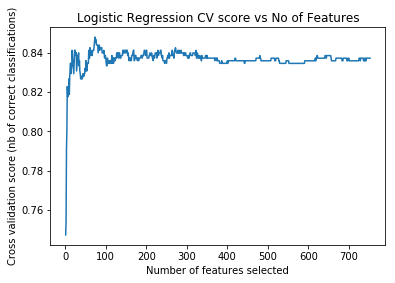

In [125]:
logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, step=1, cv=5, scoring='accuracy')
rfecv.fit(xScaled[:,2:754], y)
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [126]:
Features = df.iloc[:,2:754]
feature_importance = list(zip(Features, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)
len(new_features)

['DFA', 'locPctJitter', 'apq11Shimmer', 'meanIntensity', 'f1', 'b4', 'GNE_NSR_TKEO', 'IMF_SNR_SEO', 'IMF_NSR_entropy', 'mean_MFCC_1st_coef', 'mean_MFCC_6th_coef', 'mean_MFCC_7th_coef', 'mean_MFCC_10th_coef', 'mean_delta_log_energy', 'mean_2nd_delta', 'mean_3rd_delta', 'mean_10th_delta_delta', 'mean_11th_delta_delta', 'std_MFCC_2nd_coef', 'std_MFCC_3rd_coef', 'std_MFCC_10th_coef', 'std_delta_log_energy', 'std_6th_delta', 'std_7th_delta', 'std_8th_delta', 'std_9th_delta', 'std_10th_delta', 'std_delta_delta_log_energy', 'std_4th_delta_delta', 'std_6th_delta_delta', 'std_7th_delta_delta', 'std_9th_delta_delta', 'det_LT_entropy_shannon_4_coef', 'tqwt_energy_dec_15', 'tqwt_energy_dec_18', 'tqwt_energy_dec_19', 'tqwt_energy_dec_25', 'tqwt_entropy_shannon_dec_11', 'tqwt_entropy_shannon_dec_25', 'tqwt_entropy_shannon_dec_34', 'tqwt_entropy_shannon_dec_35', 'tqwt_entropy_log_dec_26', 'tqwt_entropy_log_dec_28', 'tqwt_entropy_log_dec_33', 'tqwt_entropy_log_dec_34', 'tqwt_entropy_log_dec_35', 'tqwt

74

In [127]:
X_rfecv=rfecv.transform(xScaled[:,2:754])
calculateAlogorithmAccuracy(GaussianNB())
calculateAlogorithmAccuracy(RandomForestClassifier(n_estimators=10, random_state=0))
calculateAlogorithmAccuracy(LogisticRegression(solver='liblinear', multi_class='ovr'))
calculateAlogorithmAccuracy(DecisionTreeClassifier())

Accuracy of classifier on test set: 0.78
mean and std on training =  (0.7163899153943402, 0.05328746184368358)
mean and std on test (0.7884416172882538, 0.046611617752961965)
G-mean score =  0.7005353936401554
             precision    recall  f1-score   support

          0       0.54      0.82      0.65        38
          1       0.92      0.77      0.84       112

avg / total       0.83      0.78      0.79       150

Accuracy of classifier on test set: 0.76
mean and std on training =  (0.8050375204092599, 0.04579629183465891)
mean and std on test (0.8239762983617986, 0.04442038624131505)
G-mean score =  0.7003454257428297
             precision    recall  f1-score   support

          0       0.53      0.55      0.54        38
          1       0.85      0.83      0.84       112

avg / total       0.76      0.76      0.76       150

Accuracy of classifier on test set: 0.84
mean and std on training =  (0.722165757313638, 0.045167709551344665)
mean and std on test (0.8901331474381318